# Advanced Plotting
## PyIU Advanced Python Workshop

Author: Robert Howard

Last modified: 4/17/2025

This notebook uses the astrophysical example of plotting a Type Ia supernova light curve to illustrate the basics of plotting with Matplotlib. It then showcases some other capabilities of this powerful plotting package.

## Astronomical Motivation: Type Ia Supernovae (SNe Ia)

- These massive explosions occur when a white dwarf (small remnant of a main-sequence star) that's in a binary system with another star accretes enough matter from its companion to reach a certain mass threshold (1.4 times the mass of the Sun), at which point the white dwarf explodes in a type Ia supernova!
<br></br>
- The pictures below depict an artist's rendering of a white dwarf accreting matter from its binary companion, as well as an SN Ia remnant called G299.2-2.9 (creative name, right?). (Image credits: NASA/CXC/U.Texas, NASA/SVS)
<br></br>
- SNe Ia peak in brightness very quickly and then slowly grow fainter. A graph of how the brightness of a supernova changes over time is called a light curve, and we can import some data to plot our own!

<table><tr>
<td> <img src="white_dwarf_accretion.jpg" alt="Artist's conception of a white dwarf accreting from another star" style="width: 400px;"/> </td>
<td> <img src="sn_ia_remnant.jpg" alt="SN Ia remnant" style="width: 400px;"/> </td>
</tr></table>

In [1]:
# Import some necessary packages
import numpy as np
import matplotlib.pyplot as plt

# Read in the data using np.loadtxt()
data_points = np.loadtxt('supernova_data.txt')
light_curve_fit = np.loadtxt('supernova_fit.txt')

# The data come as 2D arrays, so we need to split them into 1D arrays before we can plot them
data_time = data_points[:,0]
data_mag = data_points[:,1]
fit_time = light_curve_fit[:,0]
fit_mag = light_curve_fit[:,1]

## Making a Basic Plot

Now that we have our data, we can make a simple plot.

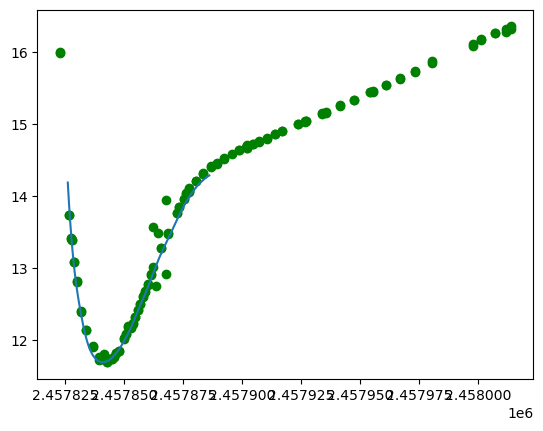

In [2]:
# Initialize figure and axis objects to give us something to make our plot on
fig, ax = plt.subplots()

# Plot the individual data points and the fit
ax.scatter(data_time, data_mag, color = 'green')
ax.plot(fit_time, fit_mag)

# Show the plot
plt.show()

## Making a Less Basic Plot

There are several essential elements of a plot that are missing here! Those are:
- Axis labels
- Title
- Legend

Other elements that aren't strictly necessary but nonetheless improve the plot:
- Conventional y-axis orientation
- Subtracting a common value from dates to improve readability
- Grid

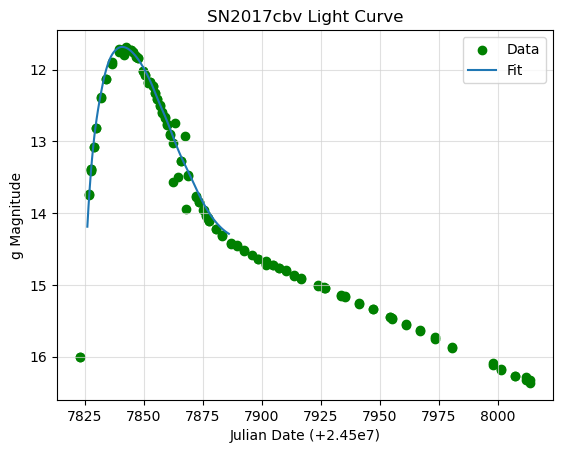

In [3]:
# Initialize new figure and axis objects
# These figure and axis objects overwrite the previous ones, since we used the same variable names
# But that's okay, because we're done with the previous plot
fig, ax = plt.subplots()

# Specify value that will be subtracted from our dates
t = 2450000

# Plot the data again
# These function calls are different from the ones in the previous cell in two ways:
#   1) We've subtracted a common value from all the dates to make the x-axis tick labels legible
#   2) We've added labels to both elements that will show up in the legend
ax.scatter(data_time - t, data_mag, color = 'green', label = 'Data')
ax.plot(fit_time - t, fit_mag, label = 'Fit')

# Add axis labels and a title, and a legend
ax.set_xlabel('Julian Date (+2.45e7)')
ax.set_ylabel('g Magnitude')
ax.set_title('SN2017cbv Light Curve')

# The title and axis labels can also be set using one function call with multiple arguments
# Putting the arguments on separate lines isn't necessary; I just find it easier to read like this
# Commented out because it's redundant with the above code
# ax.set(xlabel = 'Julian Date (+ 2.45e7)',
#        ylabel = 'g Magnitude',
#        title = 'SN2017cbv Light Curve')

# Add a legend and a grid, and flip the y-axis (conventional way to display magnitudes in astronomy)
ax.legend()
ax.invert_yaxis()
ax.grid(color = 'lightgray', alpha = 0.7)

# Save the plot as a .png file, then show it
plt.savefig('sn2017cbv_lc.png')
plt.show()

## Other Types of Plots

`matplotlib` has much more to offer than single scatter plots and line plots! Here's a tiny sample of what else it can do.
<!-- 
- Histograms
- Subplots
- Color bars -->

### Histograms

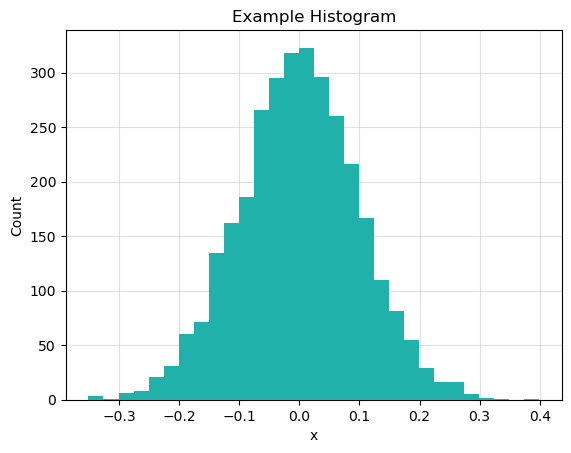

In [4]:
#----------------#
#   Histograms   #
#----------------#
# Initialize new figure and axis objects
fig, ax = plt.subplots()

# Generate some data to plot
# Set a seed so our "random" data will be the same every time
np.random.seed(3141)
fake_hist_data = np.random.normal(loc = 0, scale = 0.1, size = 3141)

# Plot the data
# The "zorder" argument forces the histogram to appear on top of the grid
# Try removing that argument to see what happens
ax.hist(fake_hist_data, bins = 30, color = 'lightseagreen', zorder = 3)

# Format the plot
# We don't need a legend with only one data set plotted
ax.set(xlabel = 'x',
       ylabel = 'Count',
       title = 'Example Histogram')
ax.grid(color = 'lightgray', alpha = 0.7)

# Show the plot
plt.show()

### Subplots

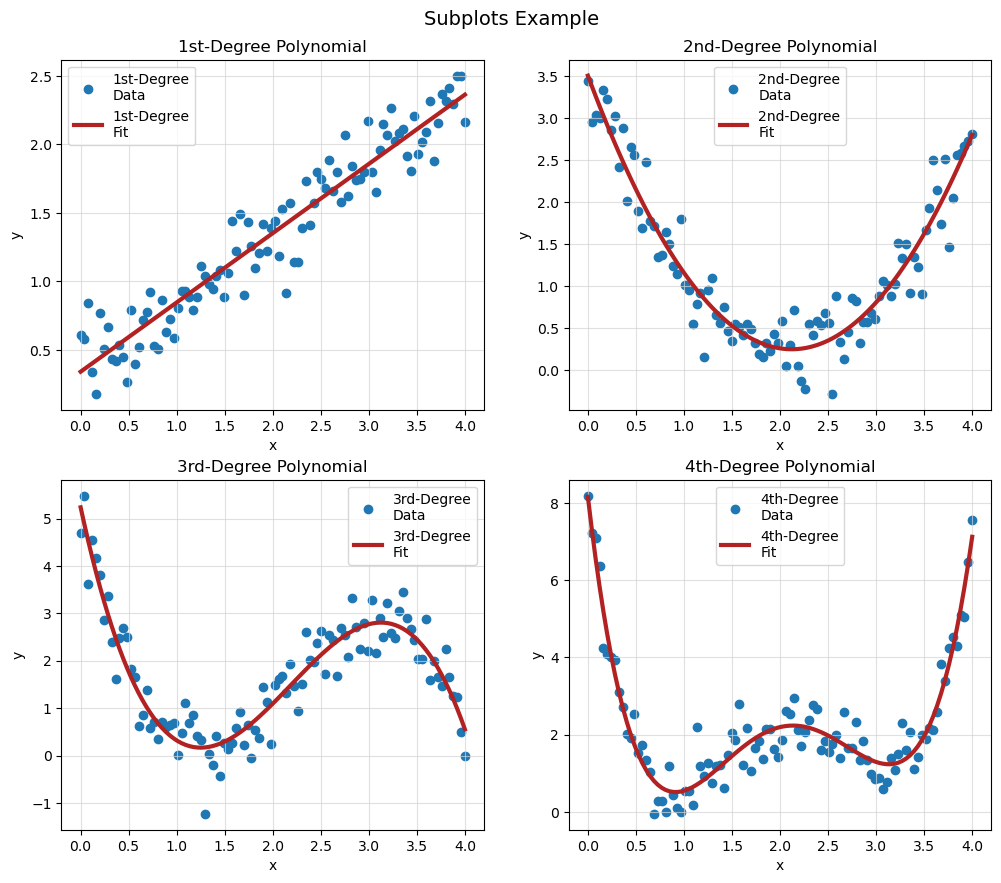

In [5]:
#--------------------------------------------#
#                  Subplots                  #
#   (aka The True Power of plt.subplots())   #
#--------------------------------------------#
# Initialize new figure and axis objects
# I give the axis object a different name here to remind myself that it's an array of axis objects
# instead of a single axis object
fig, axarr = plt.subplots(2, 2, figsize = (12, 10))

# Set a seed so the "random" noise we add to our fake data will be the same every time
np.random.seed(31415)

# Make some fake data for each of the subplots
# Plus a few examples of fitting polynomials to data using np.polyfit()!
a = 0
b = 4
x = np.linspace(start = a, stop = b, num = 100)

y1 = 0.5*x + 1/3
y1_noise = y1 + np.random.normal(0, 0.2, len(x))
p_lin = np.polyfit(x, y1_noise, 1)

y2 = 0.7*x**2 - 3*x + 3.5
y2_noise = y2 + np.random.normal(0, 0.3, len(x))
p_quad = np.polyfit(x, y2_noise, 2)

y3 = -0.75*x**3 + 5*x**2 - 9*x + 5
y3_noise = y3 + np.random.normal(0, 0.4, len(x))
p_cub = np.polyfit(x, y3_noise, 3)

y4 = 0.9*x**4 - 7.39*x**3 + 20.5*x**2 - 21.5*x + 8
y4_noise = y4 + np.random.normal(0, 0.5, len(x))
p_quar = np.polyfit(x, y4_noise, 4)

# Plot the fake data
axarr[0][0].scatter(x, y1_noise, label = '1st-Degree\nData')
axarr[0][0].plot(x, p_lin[0]*x + p_lin[1],
                 label = '1st-Degree\nFit', color = 'firebrick', lw = 3)

axarr[0][1].scatter(x, y2_noise, label = '2nd-Degree\nData')
axarr[0][1].plot(x, p_quad[0]*x**2 + p_quad[1]*x + p_quad[2],
                 label = '2nd-Degree\nFit', color = 'firebrick', lw = 3)

axarr[1][0].scatter(x, y3_noise, label = '3rd-Degree\nData')
axarr[1][0].plot(x, p_cub[0]*x**3 + p_cub[1]*x**2 + p_cub[2]*x + p_cub[3],
                 label = '3rd-Degree\nFit', color = 'firebrick', lw = 3)

axarr[1][1].scatter(x, y4_noise, label = '4th-Degree\nData')
axarr[1][1].plot(x, p_quar[0]*x**4 + p_quar[1]*x**3 + p_quar[2]*x**2 + p_quar[3]*x + p_quar[4],
                 label = '4th-Degree\nFit', color = 'firebrick', lw = 3)

# Format the plots, using two for loops to avoid writing out each function for each subplot
for i in range(2):
    for j in range(2):
        axarr[i][j].legend()
        axarr[i][j].grid(color = 'lightgray', alpha = 0.7)
        axarr[i][j].set(xlabel = 'x', ylabel = 'y')
        deg = 2*i + j + 1
        deg_str = ['st', 'nd', 'rd', 'th'][deg - 1]
        axarr[i][j].set(title = f'{deg}{deg_str}-Degree Polynomial')

fig.suptitle('Subplots Example', fontsize = 14, y = 0.93)

# Show the plots
plt.savefig('subplots_example.png')
plt.show()

### Error Bars

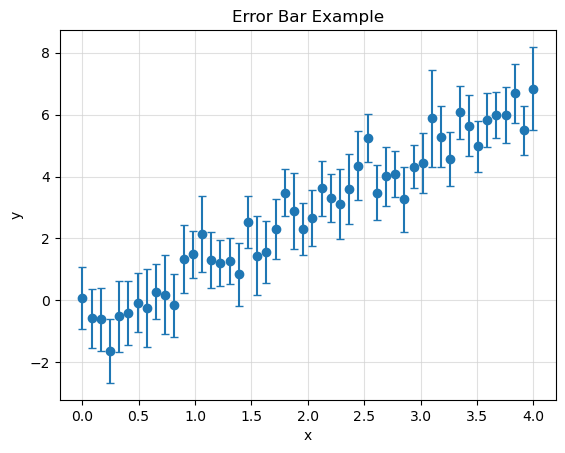

In [6]:
#----------------#
#   Error Bars   #
#----------------#
# Sometimes your data will have errors associated with them, and this is how you show that in a plot
# Initialize new figure and axis objects
fig, ax = plt.subplots()

# Generate some fake data and fake errors
# Set a random seed and create an array of x values
np.random.seed(3)
x = np.linspace(0, 4)

# Create an array of y values by applying a linear function (f(x) = 2x + 1) to the x values and then adding fake noise
y = 2*x - 1 + np.random.normal(0, 0.6, len(x))

# Create an array of fake errors by assuming a minimum error and adding fake noise on top of that
err = 0.7 + np.abs(np.random.normal(0, 0.3, len(x)))

# Plot the points and the errors in one function call
ax.errorbar(x, y, err, capsize = 3, ls = '', fmt = 'o')

# Format the plot
ax.set(xlabel = 'x', ylabel = 'y', title = 'Error Bar Example')
ax.grid(color = 'lightgray', alpha = 0.7)

# Show the plot
plt.show()

## Customization Options

- Line style (can change thickness with linewidth or lw)
- Color (can change opacity with alpha)
- Marker (can change size with markersize or ms)
- Adding text to plot
- Colorbars
- So much more!

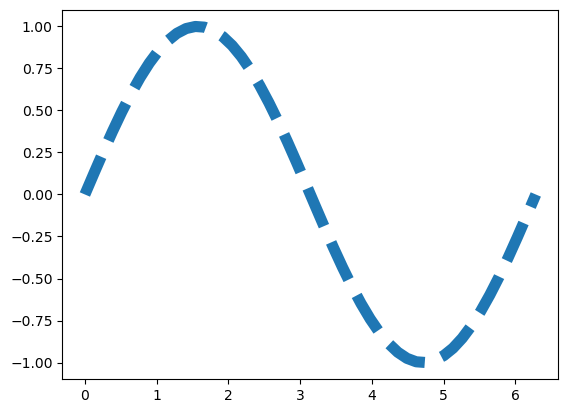

In [7]:
#-------------------------------#
#   Line Style and Line Width   #
#-------------------------------#
fig, ax = plt.subplots()

x = np.linspace(0, 2*np.pi)
y = np.sin(x)

ax.plot(x, y, ls = '--', lw = 8)
plt.show()

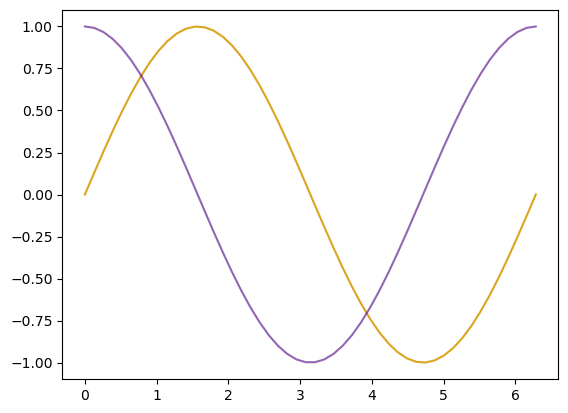

In [8]:
#-----------------------#
#   Color and Opacity   #
#-----------------------#
fig, ax = plt.subplots()

x = np.linspace(0, 2*np.pi)
y1 = np.sin(x)
y2 = np.cos(x)

ax.plot(x, y1, color = 'goldenrod')
ax.plot(x, y2, color = 'indigo', alpha = 0.6)
plt.show()

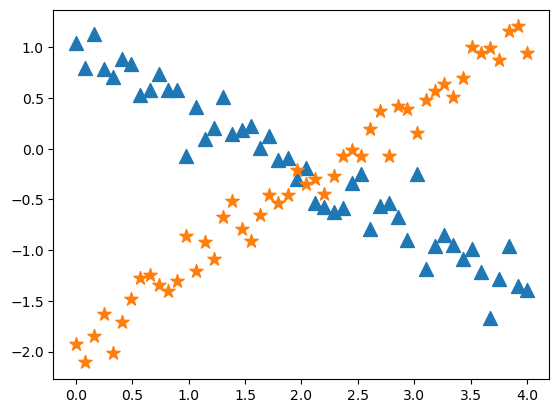

In [9]:
#-----------------------------#
#   Markers and Marker Size   #
#-----------------------------#
fig, ax = plt.subplots()

np.random.seed(3141)
x = np.linspace(0, 4)
y1 = -0.6*x + 1 + np.random.normal(0, 0.2, len(x))
y2 = 0.8*x - 2 + np.random.normal(0, 0.2, len(x))

ax.scatter(x, y1, marker = '^', s = 100)
ax.scatter(x, y2, marker = '*', s = 100)
plt.show()

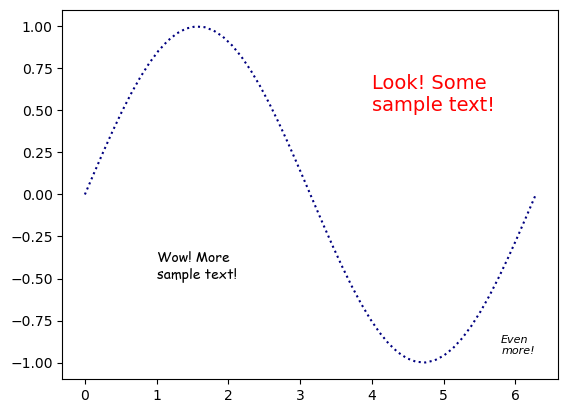

In [10]:
#-----------------#
#   Adding Text   #
#-----------------#
fig, ax = plt.subplots()

x = np.linspace(0, 2*np.pi)
y = np.sin(x)

ax.plot(x, y, ls = ':', color = 'navy')

# The numbers at the beginning of these function calls are the x and y coordinates, on the same scale as the axes,
# of the bottom-left corner of the text box
ax.text(4, 0.5, 'Look! Some\nsample text!', fontsize = 14, color = 'red')
ax.text(1, -0.5, 'Wow! More\nsample text!', fontfamily = 'cursive')
ax.text(5.8, -0.95, 'Even\nmore!', fontsize = 8, fontstyle = 'italic')

plt.show()

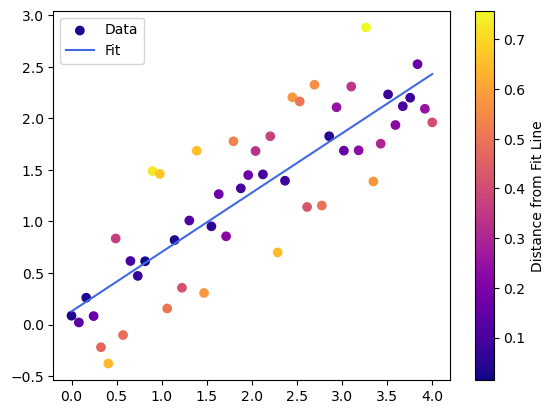

In [11]:
#---------------#
#   Colorbars   #
#---------------#
# For displaying information about a third variable in addition to the two on the axes
# Admittedly this is not a very useful example, but it illustrates how the function works
fig, ax = plt.subplots()

np.random.seed(3141592)
x = np.linspace(0, 4)
y = 0.5*x + 1/3
y_noise = y + np.random.normal(0, 0.5, len(x))
p = np.polyfit(x, y_noise, 1)

# The third variable that we'll use the colorbar to illustrate is the distance of each point from the fit line
closest_x = (x + p[0]*y_noise - p[0]*p[1])/(p[0]**2 + 1)
closest_y = p[0]*closest_x + p[1]
x_diff = x - closest_x
y_diff = y_noise - closest_y
d = np.sqrt(x_diff**2 + y_diff**2)

points = ax.scatter(x, y_noise, c = d, cmap = 'plasma', label = 'Data')
ax.plot(x, p[0]*x + p[1], color = 'royalblue', label = 'Fit')
fig.colorbar(points, label = 'Distance from Fit Line')
ax.legend()

plt.savefig('colorbar_example.png')
plt.show()

## Help

Your best bet when you have a Python question is to Google the name of the library you're using and then what you're trying to do or learn about. For example:
- matplotlib subplots
- matplotlib ax.hist
- matplotlib change default font style
- matplotlib change legend font size
- matplotlib remove white space around plot
- numpy skip first three lines when reading in file

Also, this matplotlib cheatsheet is the single most helpful document for doing anything in Python that I've ever seen. If you're wondering how to do anything in matplotlib, this is a great place to start. It even has links to the documentation pages for most of the topics it covers!
- https://matplotlib.org/cheatsheets/cheatsheets.pdf